### 1. Compare table structure

In [ ]:
import os
import pandas as pd

# Path to the folder containing CSV files
folder_path = 'compilation'

# Reference column structure using the first file
# Assuming the first file is a valid reference
reference_file = next((f for f in os.listdir(folder_path) if f.endswith('.csv')), None)
if reference_file is None:
    print("No CSV files found in the directory.")
    exit()

# Load the reference DataFrame
reference_path = os.path.join(folder_path, reference_file)
reference_df = pd.read_csv(reference_path)
reference_columns = set(reference_df.columns)

# Function to compare DataFrame columns
def compare_columns(file_path, ref_columns):
    df = pd.read_csv(file_path)
    return set(df.columns) == ref_columns

# Check column structure for each CSV file in the folder
print("Column structure comparison:")
for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    if file.endswith('.csv'):
        is_same_structure = compare_columns(file_path, reference_columns)
        print(f"{file}: {'Yes' if is_same_structure else 'No'}")

Column structure comparison:
HPO Suppliers From D&B FY23 APR-AUG.csv: Yes
HPO Suppliers From D&B FY23 DEC.csv: Yes
HPO Suppliers from D&B FY23 FEB.csv: Yes
HPO Suppliers from D&B FY23 JAN.csv: Yes
HPO Suppliers From D&B FY23 MAR.csv: Yes
HPO Suppliers From D&B FY23 SEP-NOV.csv: Yes


### 2. Compile

In [ ]:
import pandas as pd 

# Path to the folder containing the CSV file
folder_path = 'compilation'

# Print the files in the directory
print("Files in the folder:")
for file in os.listdir(folder_path):
    print(file)

dnb_dtype = {
    'Row Number':'str',
    'SUPPLIER_NBR':'str',
    'SUPPLIER_ERP':'str',
    'SUPPLIER_ADDRESS':'str',
    'SUPPLIER_CITY':'str',
    'SUPPLIER_STATE':'str',
    'SUPPLIER_ZIP_POSTAL_CDE':'str',
    'SUPPLIER_COUNTRY':'str',
    'SUPPLIER_TAX_ID':'str',
    'Match Driver':'str',
    'Confidence Code':'str',
    'Match Grade':'str',
    'Match Profile':'str',
    'Duplicate Company':'str',
    'D-U-N-S Number':'str',
    'Business Name':'str',
    'Location Type':'str',
    'Web Address':'str',
    'BEMFAB (Marketability)':'str',
    'Tradestyle Name':'str',
    'Telephone Number':'str',
    'Year Started':'str',
    'Public/Private Indicator':'str',
    'Fax Number':'str',
    'Small Business Indicator':'str',
    'Minority Owned Indicator':'str',
    'Owns/Rents Code':'str',
    'Square Footage':'str',
    'Subsidiary Indicator':'str',
    'Manufacturing Indicator':'str',
    'Legal Status Code':'str',
    'Import/Export/Agent Code':'str',
    'Accounting Firm Name':'str',
    'Currency Code':'str',
    'Status Code':'str',
    'Population Code':'str',
    'Site Status':'str',
    'Hierarchy Code':'str',
    'Dias Code':'str',
    'Last Update Date':'str',
    'National Identification Number':'str',
    'Primary Local Activity Code':'str',
    'Street Address':'str',
    'Street Address 2':'str',
    'City Name':'str',
    'State Province Abbreviation':'str',
    'State Province Name':'str',
    'Postal Code':'str',
    'County Name':'str',
    'Site ISO Country Code':'str',
    'Country/Region Code':'str',
    'Country/Region Name':'str',
    'Latitude':'str',
    'Longitude':'str',
    'Mailing Address':'str',
    'Mailing Address 2':'str',
    'Mailing City Name':'str',
    'Mailing State/Province Abbreviation':'str',
    'Mailing Postal Code':'str',
    'Carrier Route Code':'str',
    'Geo Code Accuracy':'str',
    'Latitude (Short)':'str',
    'Longitude (Short)':'str',
    'D&B Continent Code':'str',
    'D&B Country/Region Code':'str',
    'D&B State Code':'str',
    'D&B City Code':'str',
    'D&B US County Code':'str',
    'SMSA Code':'str',
    'FIPS Country/Region Code':'str',
    'FIPS State Code':'str',
    'FIPS County Code':'str',
    'FIPS MSA Code':'str',
    'Country/Region Access Code':'str',
    'Employees Here':'str',
    'Employee Count Total':'str',
    'Employee Count Range':'str',
    'Revenue (US Dollars)':'str',
    'Revenue Range':'str',
    'Employee Count Trend Year':'str',
    'Employee Count 3 Year Base':'str',
    'Employee Count 3 Year Growth Percentage':'str',
    'Employee Count 5 Year Base':'str',
    'Employee Count 5 Year Growth Percentage':'str',
    'Employee Count Total Reliability Code':'str',
    'Employee Count Here Reliability Code':'str',
    'Revenue (Local Currency)':'str',
    'Revenue Trend Year':'str',
    'Revenue 3 Year Base':'str',
    'Revenue 3 Year Growth Percentage':'str',
    'Revenue 5 Year Base':'str',
    'Revenue 5 Year Growth Percentage':'str',
    'Revenue Local Currency Reliability Code':'str',
    'Domestic Ultimate D-U-N-S Number':'str',
    'Domestic Ultimate Business Name':'str',
    'Global Ultimate D-U-N-S Number':'str',
    'Global Ultimate Business Name':'str',
    'Number of Family Members':'str',
    'Parent D-U-N-S Number':'str',
    'Domestic Ultimate Employee Count':'str',
    'Domestic Ultimate Revenue':'str',
    'Domestic Ultimate Employee Range':'str',
    'Domestic Ultimate Revenue Range':'str',
    'Domestic Ultimate Street Address':'str',
    'Domestic Ultimate City':'str',
    'Domestic Ultimate Postal Code':'str',
    'Domestic Ultimate ISO Country Code':'str',
    'Domestic Ultimate FIPS Country/Region Code':'str',
    'Domestic Ultimate D&B Country/Region Code':'str',
    'Domestic Ultimate State/Province Abbreviation':'str',
    'Global Ultimate Indicator':'str',
    'Global Ultimate ISO Country Code':'str',
    'Global Ultimate FIPS Country/Region Code':'str',
    'Global Ultimate D&B Country/Region Code':'str',
    'Global Ultimate State/Province Abbreviation':'str',
    'Headquarter D-U-N-S Number':'str',
    'Headquarter/Parent Business Name':'str',
    'Headquarters ISO Country Code':'str',
    'Headquarter/Parent D&B Country/Region Code':'str',
    'Headquarter/Parent FIPS Country/Region Code':'str',
    'Headquarter/Parent State/Province':'str',
    'Major Industry Category':'str',
    'Major Industry Category Name':'str',
    'Related Industries':'str',
    'Line of Business':'str',
    'US 1987 SIC 1':'str',
    'US 1987 SIC 2':'str',
    'US 1987 SIC 3':'str',
    'US 1987 SIC 4':'str',
    'US 1987 SIC 5':'str',
    'US 1987 SIC 6':'str',
    'Primary NAICS 1_1':'str',
    'Primary NAICS 1_2':'str',
    'Primary NAICS 1_3':'str',
    'Primary NAICS 1_4':'str',
    'NAICS 2_1 Code':'str',
    'NAICS 2_2 Code':'str',
    'NAICS 2_3 Code':'str',
    'NAICS 2_4 Code':'str',
    'NAICS 3_1 Code':'str',
    'NAICS 3_2 Code':'str',
    'NAICS 3_3 Code':'str',
    'NAICS 3_4 Code':'str',
    'NAICS 4_1 Code':'str',
    'NAICS 4_2 Code':'str',
    'NAICS 4_3 Code':'str',
    'NAICS 4_4 Code':'str',
    'NAICS 5_1 Code':'str',
    'NAICS 5_2 Code':'str',
    'NAICS 5_3 Code':'str',
    'NAICS 5_4 Code':'str',
    'NAICS 6_1 Code':'str',
    'NAICS 6_2 Code':'str',
    'NAICS 6_3 Code':'str',
    'NAICS 6_4 Code':'str',
    'UK SIC 2007':'str',
    'Chief Executive Officer Name':'str',
    'Chief Executive Officer - First Name':'str',
    'Chief Executive Officer - Middle Initial':'str',
    'Chief Executive Officer - Last Name':'str',
    'Chief Executive Officer - Suffix':'str',
    'Chief Executive Officer - Prefix':'str',
    'Chief Executive Officer Title':'str',
    'First Executive First Name':'str',
    'First Executive Middle Initial':'str',
    'First Executive Last Name':'str',
    'First Executive Suffix':'str',
    'First Executive Prefix':'str',
    'First Executive Title':'str',
    'First Executive MRC Code':'str',
    'Second Executive First Name':'str',
    'Second Executive Middle Initial':'str',
    'Second Executive Last Name':'str',
    'Second Executive Suffix':'str',
    'Second Executive Prefix':'str',
    'Second Executive Title':'str',
    'Second Executive MRC Code':'str',
    'Third Executive First Name':'str',
    'Third Executive Middle Initial':'str',
    'Third Executive Last Name':'str',
    'Third Executive Suffix':'str',
    'Third Executive Prefix':'str',
    'Third Executive Title':'str',
    'Third Executive MRC Code':'str',
    'CEO Mgmt Responsibility Code (MRC)':'str',
    'Chief Executive Officer Gender Code':'str',

}

# Create a list to hold data from each file
data_frames = []

# Read each CSV file in the folder, assuming they all have the same structure
for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    # Check if the file is a CSV
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path, dtype=dnb_dtype)
        # Add a new column 'SOURCE' to the DataFrame, which contains the file name
        df['SOURCE'] = file
        data_frames.append(df)

# Concatenate all dataframes into one
dnb_compiled = pd.concat(data_frames, ignore_index=True)

# Print the shape of the initial result
print(f"dnb compiled initial shape: {dnb_compiled.shape}")

Files in the folder:
HPO Suppliers From D&B FY23 APR-AUG.csv
HPO Suppliers From D&B FY23 DEC.csv
HPO Suppliers from D&B FY23 FEB.csv
HPO Suppliers from D&B FY23 JAN.csv
HPO Suppliers From D&B FY23 MAR.csv
HPO Suppliers From D&B FY23 SEP-NOV.csv
dnb compiled initial shape: (187, 187)


### 3. Clean and Review

In [ ]:
import pandas as pd

# Fill null values with a placeholder
dnb_compiled['SUPPLIER_NBR'] = dnb_compiled['SUPPLIER_NBR'].fillna('missing')
dnb_compiled['SUPPLIER_TAX_ID'] = dnb_compiled['SUPPLIER_TAX_ID'].fillna('missing')
dnb_compiled['SUPPLIER_ZIP_POSTAL_CDE'] = dnb_compiled['SUPPLIER_ZIP_POSTAL_CDE'].fillna('missing')

# Recreate the ASSETID after filling nulls
dnb_compiled['ASSETID'] = dnb_compiled['SUPPLIER_NBR'].astype(str) + dnb_compiled['SUPPLIER_TAX_ID'].astype(str) + dnb_compiled['SUPPLIER_ZIP_POSTAL_CDE'].astype(str)

# Set 'ASSETID' as the index
dnb_compiled.set_index('ASSETID', inplace=True)

print (f"D&B compiled shape {dnb_compiled.shape}")
print (f"Distinct SUPPLIER_NBR count: {dnb_compiled.reset_index()['SUPPLIER_NBR'].nunique()}")
print(f"Distinct Business Name count: {dnb_compiled.reset_index()['Business Name'].nunique()}")
print(f"Distinct ASSETID count: {dnb_compiled.index.nunique()}")  # Correctly accessing the index for unique count


D&B compiled shape (187, 187)
Distinct SUPPLIER_NBR count: 105
Distinct Business Name count: 15
Distinct ASSETID count: 105


### 4.1 Filter

In [ ]:
# Convert the confidence code to integer
dnb_compiled['Confidence Code'] = pd.to_numeric(dnb_compiled['Confidence Code']).fillna(0).astype(int)

# Filter Confidence Codes that are within the acceptable threshold
dnb_compiled = dnb_compiled[dnb_compiled['Confidence Code'] >=6]
# Print the length of the DataFrame after filtering
print(f"Row count after filtering: {len(dnb_compiled)}")

dnb_compiled['Confidence Code'].sort_values()

Row count after filtering: 14


ASSETID
51483-33985401748          6
51483-33985401748          6
S-001946435353493117       7
S-0284missing79912         8
S-02764321165814402        9
S-02764321165814402        9
S-02764321165814402        9
467missing8854            10
S-018445420513794118      10
S-032182380948033629      10
S-029031175883734110.0    10
S-017804310638944114.0    10
S-027426414938075034.0    10
S-032182380948033629      10
Name: Confidence Code, dtype: int32

### 4.2 Drop duplicates acording to confidence values 

In [ ]:
# Group by 'SUPPLIER_NBR' and aggregate to find the range of 'Confidence Code' for each group
confidence_range = dnb_compiled.groupby('SUPPLIER_NBR')['Confidence Code'].agg(['min', 'max'])

# Check if there are any differences in 'Confidence Code' within the duplicates
confidence_range['difference'] = confidence_range['max'] - confidence_range['min']

# Filter to see only those with differences
differences = confidence_range[confidence_range['difference'] > 0]

# Print the result
print("Groups with varying Confidence Codes:")
print(differences)

# Optionally, check how many groups have varying confidence codes
print(f"Number of supplier numbers with varying Confidence Codes: {len(differences)}")

Groups with varying Confidence Codes:
Empty DataFrame
Columns: [min, max, difference]
Index: []
Number of supplier numbers with varying Confidence Codes: 0


In [ ]:
# Sort the DataFrame by 'Confidence Code' in descending order
dnb_compiled = dnb_compiled.sort_values(by='Confidence Code', ascending=False)

# Drop duplicates based on 'SUPPLIER_NBR', keeping the entry with the highest 'Confidence Code'
dnb_compiled = dnb_compiled.drop_duplicates(subset='SUPPLIER_NBR')

# Print the length of the DataFrame after dropping duplicates
print(f"Length of DataFrame after dropping duplicates: {len(dnb_compiled)}")

dnb_compiled['Confidence Code'].sort_values()

Length of DataFrame after dropping duplicates: 10


ASSETID
51483-33985401748          6
S-001946435353493117       7
S-0284missing79912         8
S-02764321165814402        9
467missing8854            10
S-018445420513794118      10
S-032182380948033629      10
S-029031175883734110.0    10
S-017804310638944114.0    10
S-027426414938075034.0    10
Name: Confidence Code, dtype: int32

### 5. Read and clean the master

In [ ]:
import pandas as pd

dnb_dtype = {
    'uniqueIdentifier':'str',
    'clientOrgName':'str',
    'Street':'str',
    'City':'str',
    'State':'str',
    'Postal':'str',
    'Country':'str',
    'clientNationalId':'str',
    'Match Driver':'str',
    'Confidence Code':'str',
    'Match Grade':'str',
    'Match Profile':'str',
    'Duplicate Company':'str',
    'D-U-N-S Number':'str',
    'Business Name':'str',
    'Location Type':'str',
    'Web Address':'str',
    'BEMFAB (Marketability)':'str',
    'Tradestyle Name':'str',
    'Telephone Number':'str',
    'Year Started':'str',
    'Public/Private Indicator':'str',
    'Fax Number':'str',
    'Small Business Indicator':'str',
    'Minority Owned Indicator':'str',
    'Owns/Rents Code':'str',
    'Square Footage':'str',
    'Subsidiary Indicator':'str',
    'Manufacturing Indicator':'str',
    'Legal Status Code':'str',
    'Import/Export/Agent Code':'str',
    'Accounting Firm Name':'str',
    'Currency Code':'str',
    'Status Code':'str',
    'Population Code':'str',
    'Site Status':'str',
    'Hierarchy Code':'str',
    'Dias Code':'str',
    'Last Update Date':'str',
    'National Identification Number':'str',
    'Primary Local Activity Code':'str',
    'Street Address':'str',
    'Street Address 2':'str',
    'City Name':'str',
    'State Province Abbreviation':'str',
    'State Province Name':'str',
    'Postal Code':'str',
    'County Name':'str',
    'Site ISO Country Code':'str',
    'Country/Region Code':'str',
    'Country/Region Name':'str',
    'Latitude':'str',
    'Longitude':'str',
    'Mailing Address':'str',
    'Mailing Address 2':'str',
    'Mailing City Name':'str',
    'Mailing State/Province Abbreviation':'str',
    'Mailing Postal Code':'str',
    'Carrier Route Code':'str',
    'Geo Code Accuracy':'str',
    'Latitude (Short)':'str',
    'Longitude (Short)':'str',
    'D&B Continent Code':'str',
    'D&B Country/Region Code':'str',
    'D&B State Code':'str',
    'D&B City Code':'str',
    'D&B US County Code':'str',
    'SMSA Code':'str',
    'FIPS Country/Region Code':'str',
    'FIPS State Code':'str',
    'FIPS County Code':'str',
    'FIPS MSA Code':'str',
    'Country/Region Access Code':'str',
    'Employees Here':'str',
    'Employee Count Total':'str',
    'Employee Count Range':'str',
    'Revenue (US Dollars)':'str',
    'Revenue Range':'str',
    'Employee Count Trend Year':'str',
    'Employee Count 3 Year Base':'str',
    'Employee Count 3 Year Growth Percentage':'str',
    'Employee Count 5 Year Base':'str',
    'Employee Count 5 Year Growth Percentage':'str',
    'Employee Count Total Reliability Code':'str',
    'Employee Count Here Reliability Code':'str',
    'Revenue (Local Currency)':'str',
    'Revenue Trend Year':'str',
    'Revenue 3 Year Base':'str',
    'Revenue 3 Year Growth Percentage':'str',
    'Revenue 5 Year Base':'str',
    'Revenue 5 Year Growth Percentage':'str',
    'Revenue Local Currency Reliability Code':'str',
    'Domestic Ultimate D-U-N-S Number':'str',
    'Domestic Ultimate Business Name':'str',
    'Global Ultimate D-U-N-S Number':'str',
    'Global Ultimate Business Name':'str',
    'Number of Family Members':'str',
    'Parent D-U-N-S Number':'str',
    'Domestic Ultimate Employee Count':'str',
    'Domestic Ultimate Revenue':'str',
    'Domestic Ultimate Employee Range':'str',
    'Domestic Ultimate Revenue Range':'str',
    'Domestic Ultimate Street Address':'str',
    'Domestic Ultimate City':'str',
    'Domestic Ultimate Postal Code':'str',
    'Domestic Ultimate ISO Country Code':'str',
    'Domestic Ultimate FIPS Country/Region Code':'str',
    'Domestic Ultimate D&B Country/Region Code':'str',
    'Domestic Ultimate State/Province Abbreviation':'str',
    'Global Ultimate Indicator':'str',
    'Global Ultimate ISO Country Code':'str',
    'Global Ultimate FIPS Country/Region Code':'str',
    'Global Ultimate D&B Country/Region Code':'str',
    'Global Ultimate State/Province Abbreviation':'str',
    'Headquarter D-U-N-S Number':'str',
    'Headquarter/Parent Business Name':'str',
    'Headquarters ISO Country Code':'str',
    'Headquarter/Parent D&B Country/Region Code':'str',
    'Headquarter/Parent FIPS Country/Region Code':'str',
    'Headquarter/Parent State/Province':'str',
    'Major Industry Category':'str',
    'Major Industry Category Name':'str',
    'Related Industries':'str',
    'Line of Business':'str',
    'US 1987 SIC 1':'str',
    'US 1987 SIC 2':'str',
    'US 1987 SIC 3':'str',
    'US 1987 SIC 4':'str',
    'US 1987 SIC 5':'str',
    'US 1987 SIC 6':'str',
    'Primary NAICS 1_1':'str',
    'Primary NAICS 1_2':'str',
    'Primary NAICS 1_3':'str',
    'Primary NAICS 1_4':'str',
    'NAICS 2_1 Code':'str',
    'NAICS 2_2 Code':'str',
    'NAICS 2_3 Code':'str',
    'NAICS 2_4 Code':'str',
    'NAICS 3_1 Code':'str',
    'NAICS 3_2 Code':'str',
    'NAICS 3_3 Code':'str',
    'NAICS 3_4 Code':'str',
    'NAICS 4_1 Code':'str',
    'NAICS 4_2 Code':'str',
    'NAICS 4_3 Code':'str',
    'NAICS 4_4 Code':'str',
    'NAICS 5_1 Code':'str',
    'NAICS 5_2 Code':'str',
    'NAICS 5_3 Code':'str',
    'NAICS 5_4 Code':'str',
    'NAICS 6_1 Code':'str',
    'NAICS 6_2 Code':'str',
    'NAICS 6_3 Code':'str',
    'NAICS 6_4 Code':'str',
    'UK SIC 2007':'str',
    'Chief Executive Officer Name':'str',
    'Chief Executive Officer - First Name':'str',
    'Chief Executive Officer - Middle Initial':'str',
    'Chief Executive Officer - Last Name':'str',
    'Chief Executive Officer - Suffix':'str',
    'Chief Executive Officer - Prefix':'str',
    'Chief Executive Officer Title':'str',
    'First Executive First Name':'str',
    'First Executive Middle Initial':'str',
    'First Executive Last Name':'str',
    'First Executive Suffix':'str',
    'First Executive Prefix':'str',
    'First Executive Title':'str',
    'First Executive MRC Code':'str',
    'Second Executive First Name':'str',
    'Second Executive Middle Initial':'str',
    'Second Executive Last Name':'str',
    'Second Executive Suffix':'str',
    'Second Executive Prefix':'str',
    'Second Executive Title':'str',
    'Second Executive MRC Code':'str',
    'Third Executive First Name':'str',
    'Third Executive Middle Initial':'str',
    'Third Executive Last Name':'str',
    'Third Executive Suffix':'str',
    'Third Executive Prefix':'str',
    'Third Executive Title':'str',
    'Third Executive MRC Code':'str',
    'CEO Mgmt Responsibility Code (MRC)':'str',
    'Chief Executive Officer Gender Code':'str',
    'SUPPLIER_NBR':'str',
    'SUPPLIER_ERP':'str',
    'SUPPLIER_ADDRESS':'str',
    'SUPPLIER_CITY':'str',
    'SUPPLIER_STATE':'str',
    'SUPPLIER_ZIP_POSTAL_CDE':'str',
    'SUPPLIER_COUNTRY':'str',
    'SUPPLIER_TAX_ID':'str',
    'DNB_PROCESS_ID':'str',
}

# Read the dnb master and print the row count and distinct supplier normalized 
dnb_master = pd.read_csv('D&B Output Master.csv', encoding='UTF-8-SIG', dtype=dnb_dtype)

# Fill null values with a placeholder
dnb_master['SUPPLIER_NBR'] = dnb_master['SUPPLIER_NBR'].fillna('missing')
dnb_master['SUPPLIER_TAX_ID'] = dnb_master['SUPPLIER_TAX_ID'].fillna('missing')
dnb_master['SUPPLIER_ZIP_POSTAL_CDE'] = dnb_master['SUPPLIER_ZIP_POSTAL_CDE'].fillna('missing')

# Recreate the ASSETID after filling nulls
dnb_master['ASSETID'] = dnb_master['SUPPLIER_NBR'].astype(str) + dnb_master['SUPPLIER_TAX_ID'].astype(str) + dnb_master['SUPPLIER_ZIP_POSTAL_CDE'].astype(str)

# Set 'ASSETID' as the index
dnb_master.set_index('ASSETID', inplace=True)

# Add empty 'SUPPLIER_TYPE' and 'SOURCE' columns with a placeholder value
dnb_master['SOURCE'] = None

print (f"D&B Master shape {dnb_master.shape}")
print (f"Distinct SUPPLIER_NBR count: {dnb_master['SUPPLIER_NBR'].nunique()}")
print(f"Distinct Business Name count: {dnb_master['Business Name'].nunique()}")
print(f"Distinct ASSETID count: {dnb_master.index.nunique()}") 

D&B Master shape (212, 195)
Distinct SUPPLIER_NBR count: 212
Distinct Business Name count: 212
Distinct ASSETID count: 212


In [ ]:
# Get the sets of ASSETIDs from both dataframes
assetid_compiled = set(dnb_compiled.index)
assetid_master = set(dnb_master.index)

# 1. Shared values (Intersection)
shared_assetids = assetid_compiled & assetid_master
print(f"Number of shared ASSETIDs: {len(shared_assetids)}")

# 2. Unique to D&B compiled
unique_to_compiled = assetid_compiled - shared_assetids
print(f"Number of ASSETIDs only in D&B compiled: {len(unique_to_compiled)}")

# Extract and print SUPPLIER_ERP for unique ASSETIDs only in D&B compiled
unique_compiled_supplier_erp = dnb_compiled.loc[unique_to_compiled, 'SUPPLIER_ERP']
print("SUPPLIER_ERP for unique entries in D&B compiled:")
print(unique_compiled_supplier_erp)

# 3. Unique to D&B master
unique_to_master = assetid_master - shared_assetids
print(f"Number of ASSETIDs only in D&B master: {len(unique_to_master)}")



Number of shared ASSETIDs: 2
Number of ASSETIDs only in D&B compiled: 8
SUPPLIER_ERP for unique entries in D&B compiled:
ASSETID
467missing8854                                     SwagUp Inc
S-018445420513794118                Presidio Interactive Corp
51483-33985401748                            PCC Delaware LLC
S-017804310638944114.0             AmTrust North America Inc.
S-001946435353493117                         SecureDocs, Inc.
S-032182380948033629      Stratus Building Solutions of Tampa
S-0284missing79912                  ADP, Inc (Client# 239710)
S-02764321165814402                           Cross Insurance
Name: SUPPLIER_ERP, dtype: object
Number of ASSETIDs only in D&B master: 210


D:\Users\diana.fernandez\AppData\Local\Temp\1\ipykernel_9708\646550859.py:14: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  unique_compiled_supplier_erp = dnb_compiled.loc[unique_to_compiled, 'SUPPLIER_ERP']


### Merge-Update Operation

In [ ]:
# Check for null values in the columns used to create ASSETID
null_counts = dnb_master[['SUPPLIER_NBR', 'SUPPLIER_TAX_ID', 'SUPPLIER_ZIP_POSTAL_CDE']].isnull().sum()
print("Null values per column:")
print(null_counts)

null_counts2 = dnb_compiled[['SUPPLIER_NBR', 'SUPPLIER_TAX_ID', 'SUPPLIER_ZIP_POSTAL_CDE']].isnull().sum()
print("Null values per column:")
print(null_counts2)

Null values per column:
SUPPLIER_NBR               0
SUPPLIER_TAX_ID            0
SUPPLIER_ZIP_POSTAL_CDE    0
dtype: int64
Null values per column:
SUPPLIER_NBR               0
SUPPLIER_TAX_ID            0
SUPPLIER_ZIP_POSTAL_CDE    0
dtype: int64


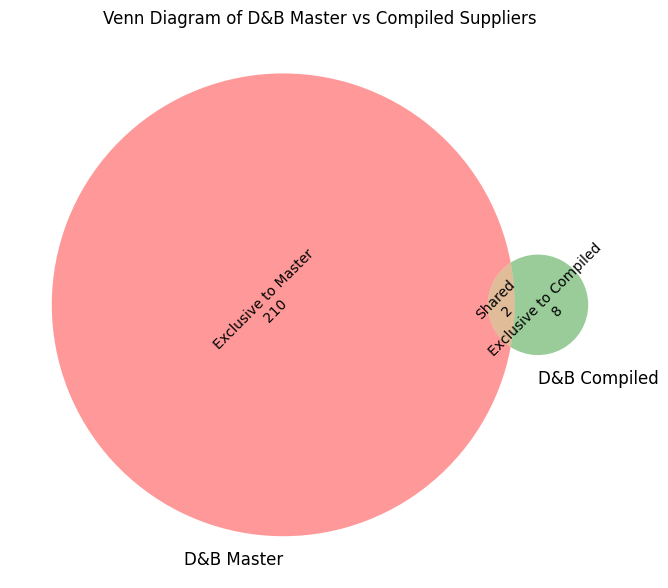

Updated dnb_master shape: (220, 196)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Perform an outer join for visualization purposes
merged_df = pd.merge(dnb_master, dnb_compiled, left_index=True, right_index=True, how='outer', indicator=True)

# Visualize the overlap using a Venn diagram
exclusive_to_master_count = merged_df['_merge'].eq('left_only').sum()
exclusive_to_compiled_count = merged_df['_merge'].eq('right_only').sum()
shared_entries_count = merged_df['_merge'].eq('both').sum()

plt.figure(figsize=(8, 8))
venn_diagram = venn2(
    subsets=(exclusive_to_master_count, exclusive_to_compiled_count, shared_entries_count),
    set_labels=('D&B Master', 'D&B Compiled')
)
venn_diagram.get_label_by_id('10').set_text(f'Exclusive to Master\n{exclusive_to_master_count}')
venn_diagram.get_label_by_id('10').set_rotation(45)
venn_diagram.get_label_by_id('01').set_text(f'Exclusive to Compiled\n{exclusive_to_compiled_count}')
venn_diagram.get_label_by_id('01').set_rotation(45)
venn_diagram.get_label_by_id('11').set_text(f'Shared\n{shared_entries_count}')
venn_diagram.get_label_by_id('11').set_rotation(45)
plt.title('Venn Diagram of D&B Master vs Compiled Suppliers')
plt.show()

# Directly update dnb_master with shared and new entries from dnb_compiled
# Update shared entries with the latest info from dnb_compiled
dnb_master.update(dnb_compiled)

# Add new exclusive entries from dnb_compiled to dnb_master
new_entries = dnb_compiled[~dnb_compiled.index.isin(dnb_master.index)]
dnb_master = pd.concat([dnb_master, new_entries])

# Ensure no duplicate entries in dnb_master
dnb_master = dnb_master[~dnb_master.index.duplicated(keep='first')]

# Save or further process the updated dnb_master
print(f"Updated dnb_master shape: {dnb_master.shape}")

In [ ]:

# Determine the common columns that can be updated
common_columns = dnb_master.columns.intersection(dnb_compiled.columns)

# Update shared entries in dnb_master from dnb_compiled for common columns
shared_indices = dnb_master.index.intersection(dnb_compiled.index)
dnb_master.loc[shared_indices, common_columns] = dnb_compiled.loc[shared_indices, common_columns]

# Append new exclusive entries from dnb_compiled to dnb_master, ensuring only common columns are considered
exclusive_indices = dnb_compiled.index.difference(dnb_master.index)
exclusive_entries = dnb_compiled.loc[exclusive_indices, common_columns]
dnb_master = pd.concat([dnb_master, exclusive_entries])

# Reset index if necessary (depending on further use)
dnb_master.reset_index(drop=True, inplace=True)

# Verify the final DataFrame
print(f"Updated dnb_master shape: {dnb_master.shape}")


Updated dnb_master shape: (220, 196)


In [ ]:
import re

# Function to replace special characters, handle whitespaces, and convert to uppercase
def replace_char(word):
    # Remove special characters
    special_chars = ['$', '%', '^', '*', '#', '(', ')', '[', ']', ';', ':', '"', "'", ',', '.']
    for char in special_chars:
        word = word.replace(char, '')
    
    # Remove leading and trailing spaces, and replace multiple spaces with a single space
    word = re.sub(r'\s+', ' ', word.strip())
    
    # Convert to uppercase
    return word.upper()

# Apply normalization function to the DataFrame columns
dnb_master['Business Name'] = dnb_master['Business Name'].apply(replace_char)
dnb_master['Global Ultimate Business Name'] = dnb_master['Global Ultimate Business Name'].apply(replace_char)

In [ ]:
# Export dnb_master DataFrame to CSV with specified settings
dnb_master.to_csv('D&B Output Master 5.31.24.csv', encoding='UTF-8-SIG', index=False)